In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from matplotlib.dates import date2num, DateFormatter

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [4]:
len(df['Country'].unique())

37

In [5]:
df = df.sort_values(by=['Country', 'Date'], ascending=[True, True])
df

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
175,2003-04-01,Australia,1,0,0
192,2003-04-02,Australia,1,0,0
210,2003-04-03,Australia,1,0,0
228,2003-04-04,Australia,1,0,0
247,2003-04-05,Australia,1,0,0
...,...,...,...,...,...
2413,2003-07-07,Viet Nam,63,5,58
2444,2003-07-08,Viet Nam,63,5,58
2475,2003-07-09,Viet Nam,63,5,58
2506,2003-07-10,Viet Nam,63,5,58


In [6]:
df.describe()

,Cumulative number of case(s),Number of deaths,Number recovered
count,2538.000000,2538.000000,2538.000000
mean,219.211978,17.812845,134.678487
std,825.024564,61.425627,581.595350
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,3.000000,0.000000,2.000000
75%,14.750000,2.000000,9.000000
max,5329.000000,348.000000,4941.000000


In [7]:
df.query('Country == "Singapore"')

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
2,2003-03-17,Singapore,20,0,0
10,2003-03-18,Singapore,23,0,0
21,2003-03-19,Singapore,31,0,0
33,2003-03-20,Singapore,34,0,0
48,2003-03-21,Singapore,39,0,0
...,...,...,...,...,...
2405,2003-07-07,Singapore,206,32,171
2436,2003-07-08,Singapore,206,32,171
2467,2003-07-09,Singapore,206,32,171
2498,2003-07-10,Singapore,206,32,172


In [8]:
df.isnull().sum()

Date                            0
Country                         0
Cumulative number of case(s)    0
Number of deaths                0
Number recovered                0
dtype: int64

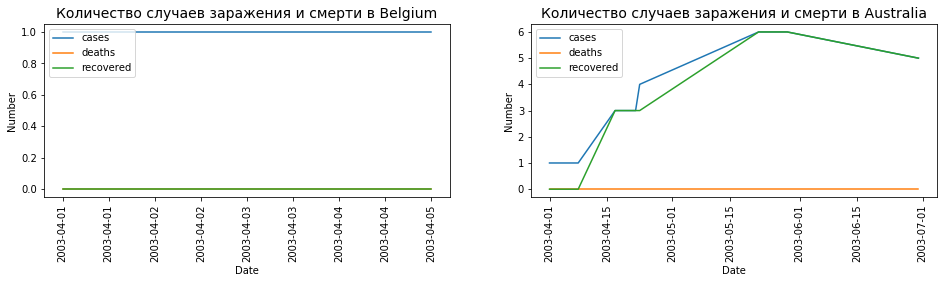

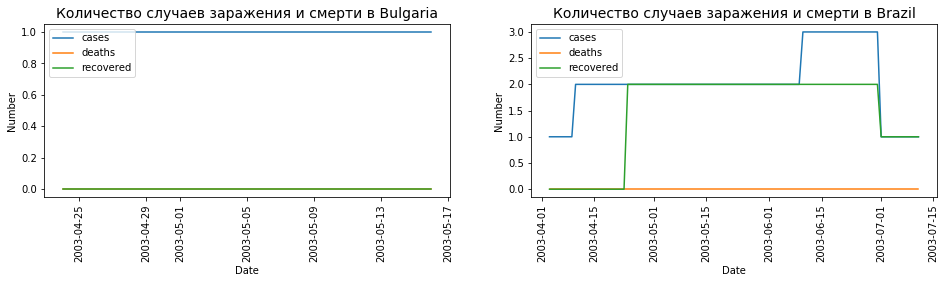

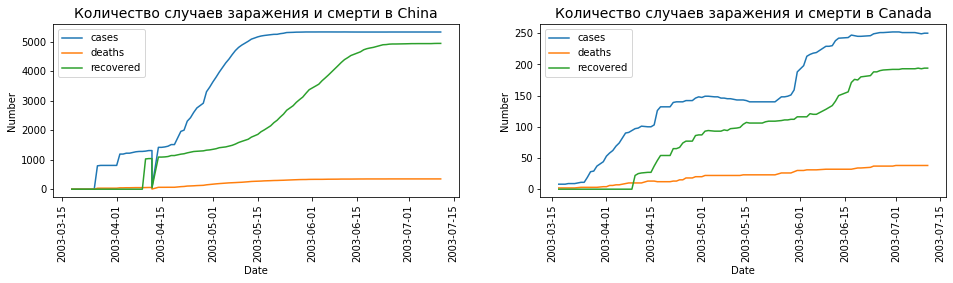

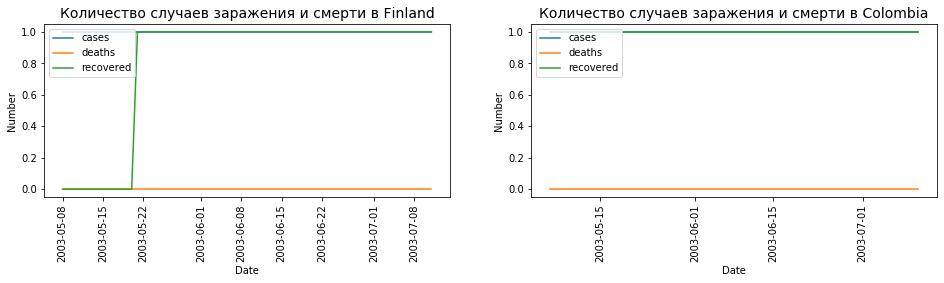

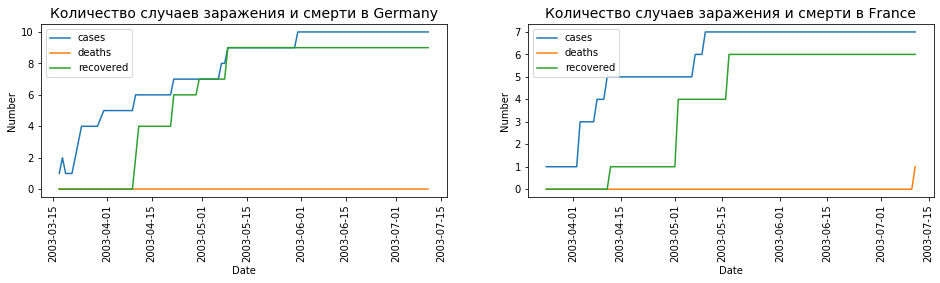

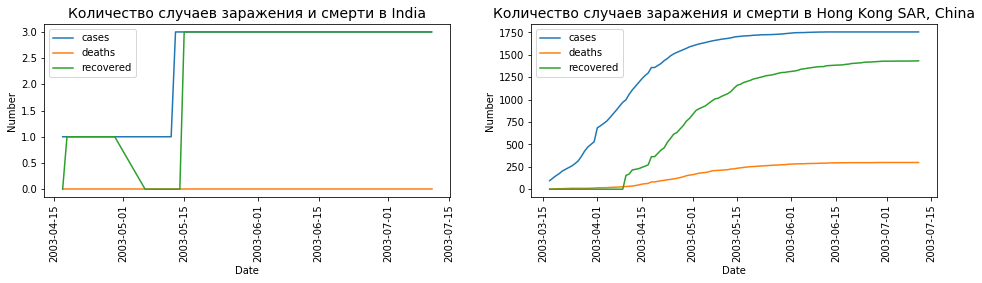

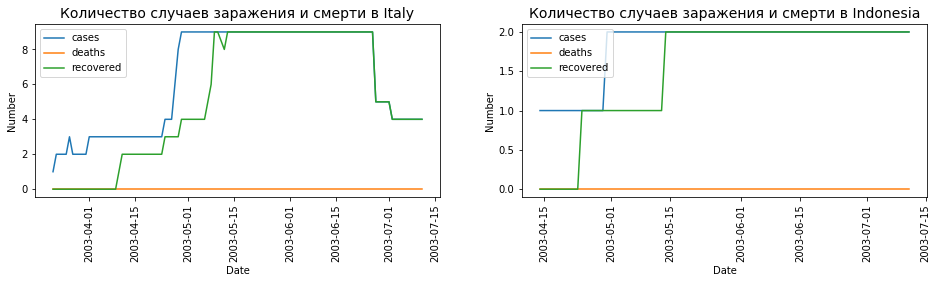

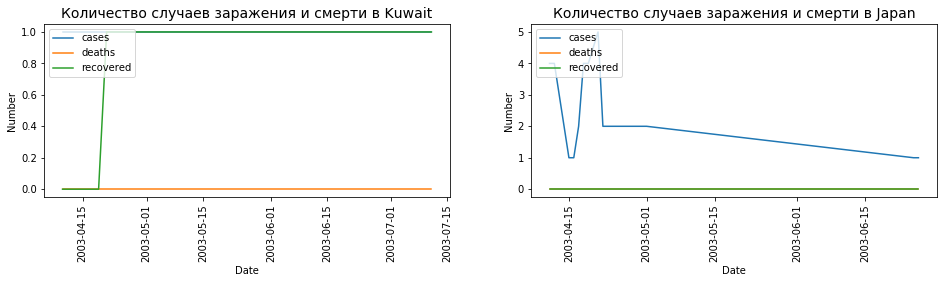

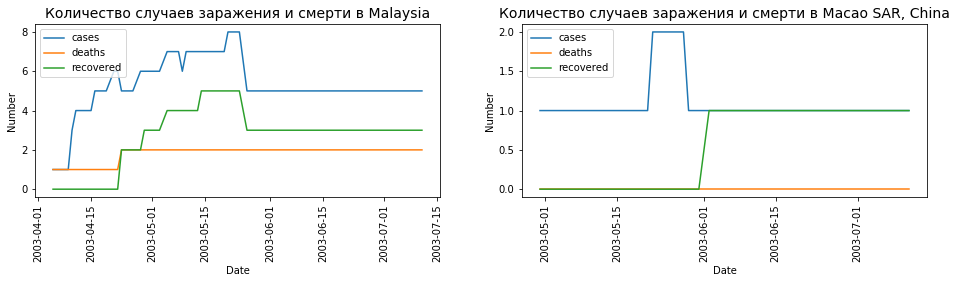

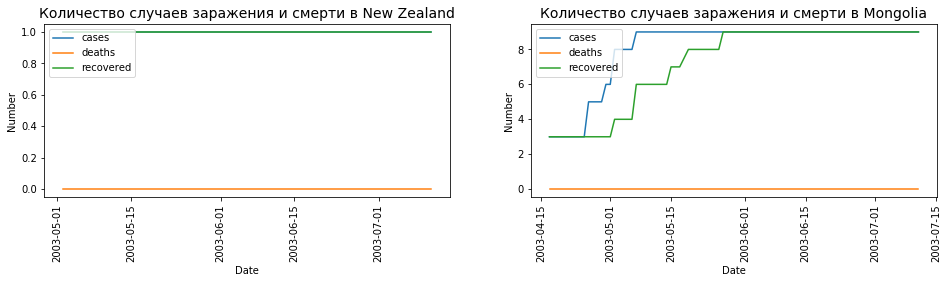

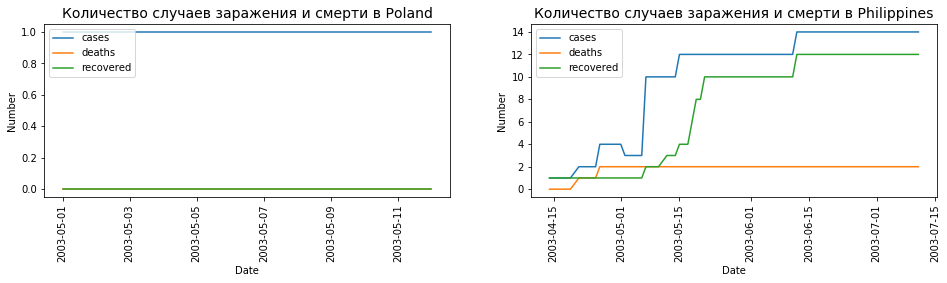

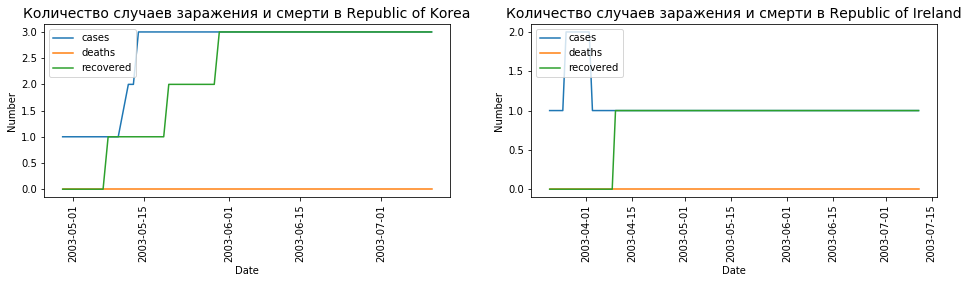

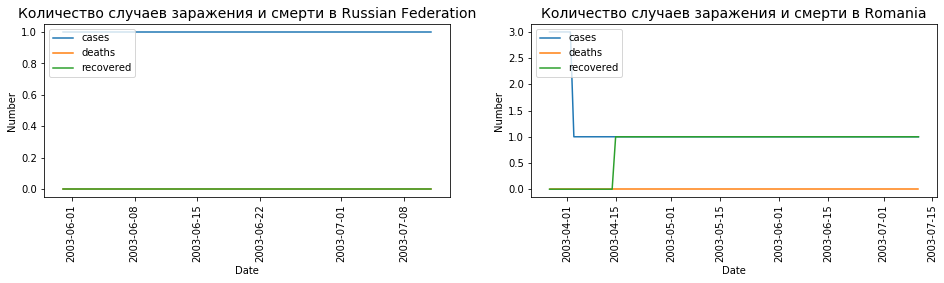

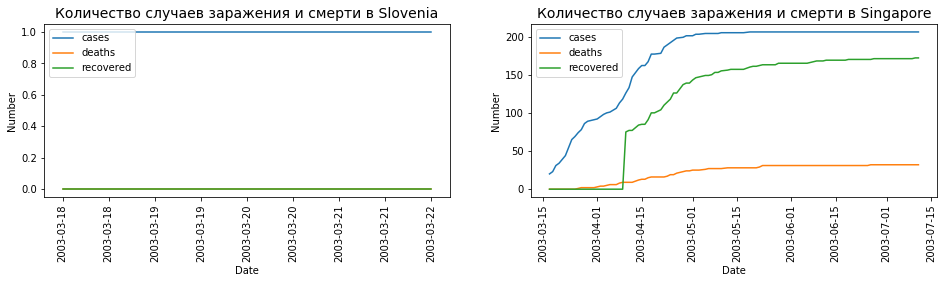

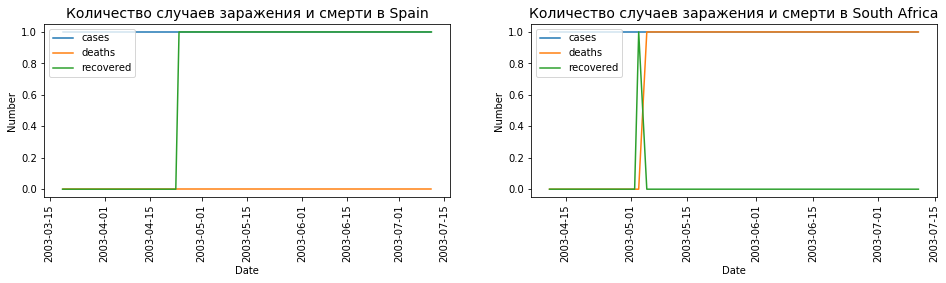

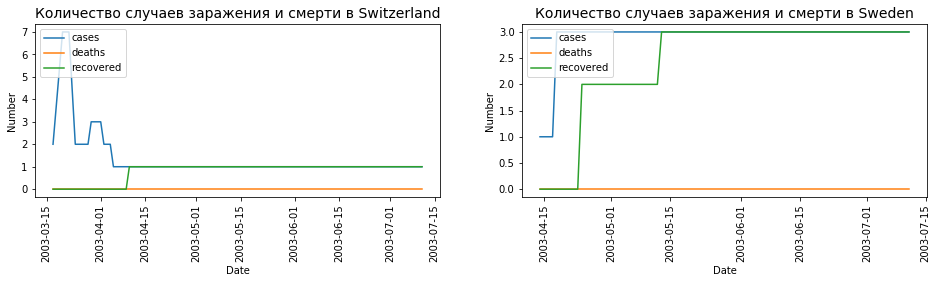

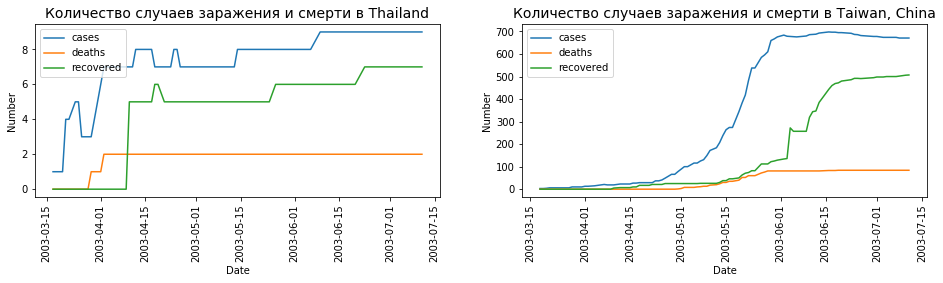

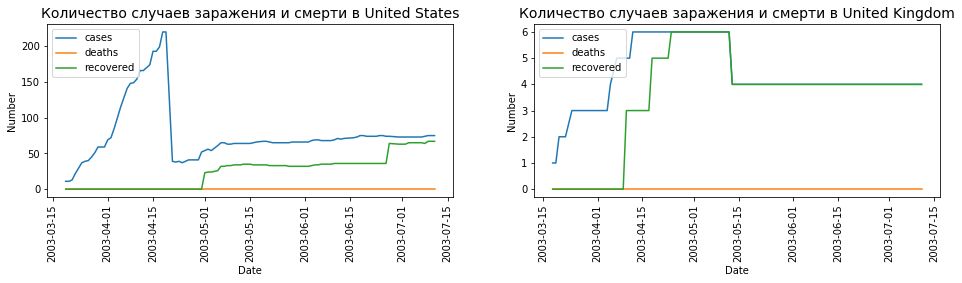

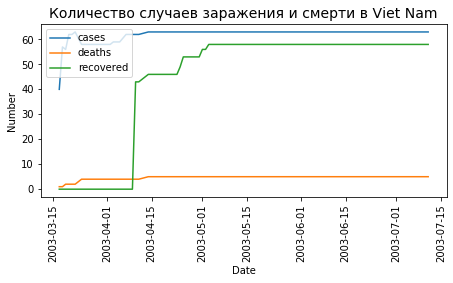

In [9]:
name1 = 'Cumulative number of case(s)'
name2 = 'Number of deaths'
name3 = 'Number recovered'

def sars_plot(ax, country, sars_fd):
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    
    ax.set_title('Количество случаев заражения и смерти в {0}'.format(str(country)), fontdict={'size': 14})
    ax.set_ylabel('Number', fontdict={'size': 10})
    ax.set_xlabel('Date', fontdict={'size': 10})
    
    ax.plot(pd.to_datetime(sars_fd['Date'].astype(str)), sars_fd[name1], label='cases')
    ax.plot(pd.to_datetime(sars_fd['Date'].astype(str)), sars_fd[name2], label='deaths')
    ax.plot(pd.to_datetime(sars_fd['Date'].astype(str)), sars_fd[name3], label='recovered')
    
    ax.legend(loc='upper left')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
        
i = 0
prev_country = None
for country in df['Country'].unique():
    if i % 2 == 1:
        new_df1 = df.query('Country == "{0}"'.format(str(country)))
        new_df2 = df.query('Country == "{0}"'.format(str(prev_country)))
    
        fig = plt.figure(figsize=(16, 7))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
    
        sars_plot(ax1, country, new_df1)
        sars_plot(ax2, prev_country, new_df2)
    elif i == len(df['Country'].unique()) - 1:
        new_df = df.query('Country == "{0}"'.format(str(country)))
        fig = plt.figure(figsize=(16, 7))
        ax = fig.add_subplot(221)
        sars_plot(ax, country, new_df)
    else:
        prev_country = country
        
    plt.show()
    i += 1

In [10]:
perc_df1 = df.groupby('Country').max()
perc_df = perc_df1[perc_df1['Cumulative number of case(s)'] > 10]


percentage = perc_df['Number of deaths'] / perc_df['Cumulative number of case(s)'] * 100

percentage

Country
Canada                  15.079365
China                    6.530306
Hong Kong SAR, China    16.980057
Philippines             14.285714
Singapore               15.533981
Taiwan, China           12.034384
United States            0.000000
Viet Nam                 7.936508
dtype: float64

Canada
China
Hong Kong SAR, China
Philippines
Singapore
Taiwan, China
United States
Viet Nam


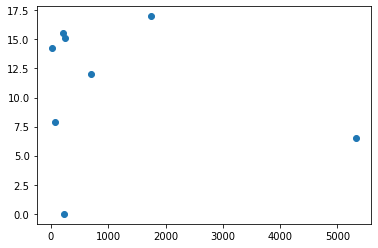

In [11]:
perc_num_cases = list()
for country, value in percentage.items():
    print(str(country))
    another_df = df[df['Country'] == country]
    perc_num_cases.append((another_df['Cumulative number of case(s)'].max(), value))

plt.scatter(*zip(*perc_num_cases))
plt.show()

## Проанализировал процент смертей от количества случаев заражения.
## Не зависит от общего количества. Возможно от медицины и скорости распространения.

## Получил данные о том, что в США хорошая медицина, а в Singapore нет.

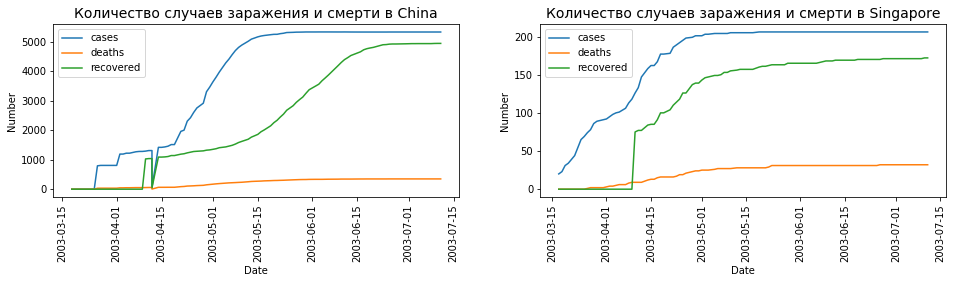

In [12]:
new_df1 = df.query('Country == "China"')
new_df2 = df.query('Country == "Singapore"')

fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sars_plot(ax1, "China", new_df1)
sars_plot(ax2, "Singapore", new_df2)
plt.show()

In [44]:
ch_small_df = df.query('Country == "China"').query('Date < "2003-05-01"')
ch_big_df = df.query('Country == "China"')
ch_big_df_not_fltr = df.query('Country == "China"').query('Date > "2003-05-10"')
si_df = df.query('Country == "Singapore"')
ch_small_df = ch_small_df.drop_duplicates(subset='Date', keep='first')
ch_big_df = ch_big_df.drop_duplicates(subset='Date', keep='first')
ch_big_df_not_fltr = ch_big_df_not_fltr.drop_duplicates(subset='Date', keep='first')

In [45]:
def perc_country(cur_df, country):
    cur_df = cur_df[cur_df['Cumulative number of case(s)'] > 0]
    res = list()
    for date in cur_df['Date']:
        deaths = cur_df.query('Date == "{0}"'.format(str(date)))['Number of deaths']
        all_cases = cur_df.query('Date == "{0}"'.format(str(date)))['Cumulative number of case(s)']
        
        res.append((pd.to_datetime(str(date)), float(deaths / all_cases) * 100))
    
    return res
        

perc_res_ch = perc_country(ch_small_df, "China")
perc_res_si = perc_country(si_df, "Singapore")
perc_res_ch_big = perc_country(ch_big_df, "China")
perc_res_ch_big_not_fltr = perc_country(ch_big_df_not_fltr, "China")

## Смотрим на маленькое количетсво случаев в Китае и Сингапуре

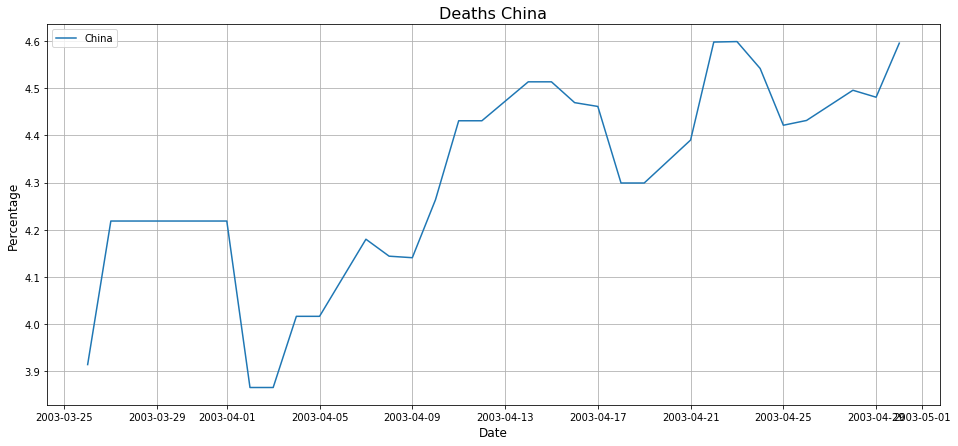

In [46]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.set_title('Deaths China', fontdict={'size': 16})
ax.set_ylabel('Percentage', fontdict={'size': 12})
ax.set_xlabel('Date', fontdict={'size': 12})
ax.plot(*zip(*perc_res_ch),  label='China')
ax.legend(loc='best')
plt.grid(which='both')
plt.show()

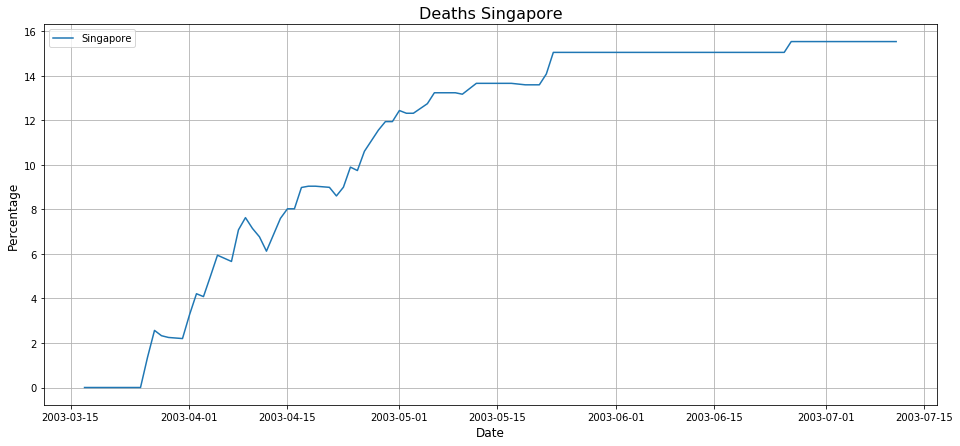

In [47]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.set_title('Deaths Singapore', fontdict={'size': 16})
ax.set_ylabel('Percentage', fontdict={'size': 12})
ax.set_xlabel('Date', fontdict={'size': 12})
ax.plot(*zip(*perc_res_si), label='Singapore')
ax.legend(loc='best')
plt.grid(which='both')
plt.show()

## Смотрим процент смертей в Китае, не ограничивая дату, т.е. за всё время

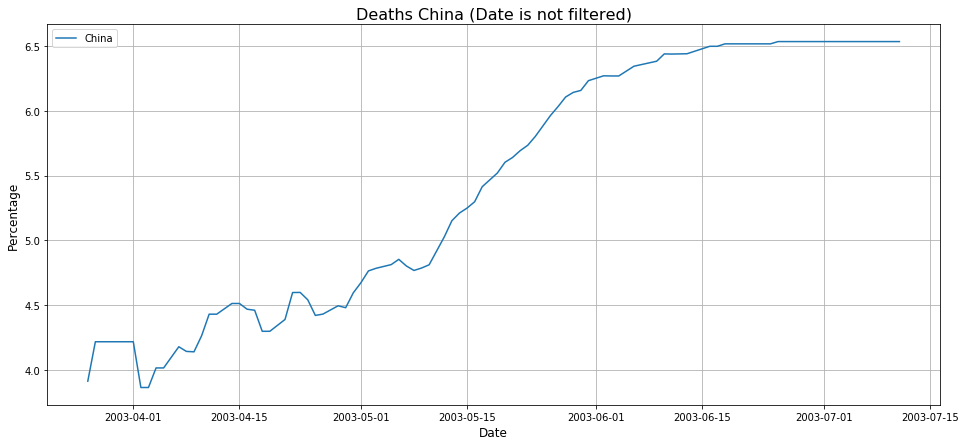

In [48]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.set_title('Deaths China (Date is not filtered)', fontdict={'size': 16})
ax.set_ylabel('Percentage', fontdict={'size': 12})
ax.set_xlabel('Date', fontdict={'size': 12})
ax.plot(*zip(*perc_res_ch_big),  label='China')
ax.legend(loc='best')
plt.grid(which='both')
plt.show()

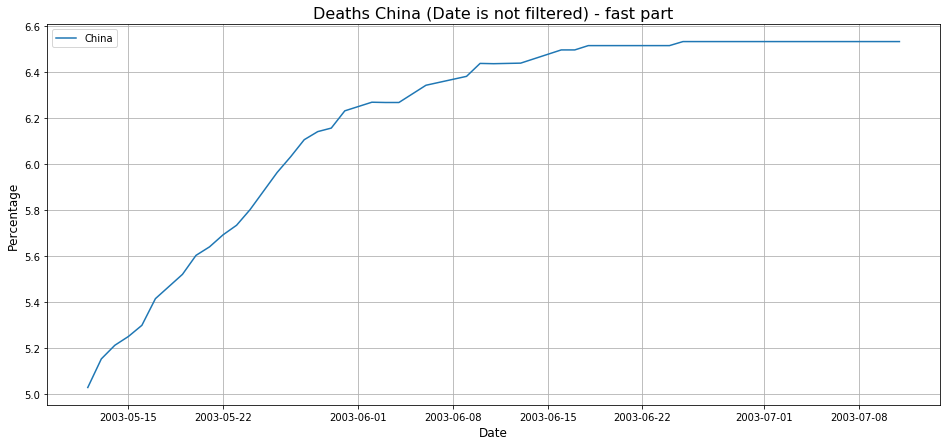

In [110]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.set_title('Deaths China (Date is not filtered) - fast part', fontdict={'size': 16})
ax.set_ylabel('Percentage', fontdict={'size': 12})
ax.set_xlabel('Date', fontdict={'size': 12})
ax.plot(*zip(*perc_res_ch_big_not_fltr),  label='China')
ax.legend(loc='best')
plt.grid(which='both')
plt.show()

In [80]:
first = None
second = None
for pair in perc_res_ch_big_not_fltr:
    if pd.to_datetime('2003-05-15') == pair[0]:
        first = pair[1]
    if pd.to_datetime('2003-05-30') == pair[0]:
        second = pair[1]

In [103]:
koef1 = (second - first) / 15
koef1

0.7311274024172775

In [104]:
first = None
second = None
for pair in perc_res_ch_big:
    if pd.to_datetime('2003-04-15') == pair[0]:
        first = pair[1]
    if pd.to_datetime('2003-05-15') == pair[0]:
        second = pair[1]

In [105]:
koef2 = (second - first) / 30
koef2

0.02451623842244475

In [106]:
first = None
second = None
for pair in perc_res_si:
    if pd.to_datetime('2003-04-03') == pair[0]:
        first = pair[1]
    if pd.to_datetime('2003-06-02') == pair[0]:
        second = pair[1]

In [107]:
koef3 = (second - first) / 60
koef3

0.18278185060431937

In [109]:
koef4 = koef3 * koef1 / koef2
koef4

5.4509512160321325

## Вывод

Зависимость процента от времени - линейная. Находим коэффициент в Китае при малом количестве зараженных и большом. Смотрим на коэффициент при малом в Сингапуре. Находим при большом по формуле выше.